### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import pickle

# Apply better style
sns.set_theme(style="whitegrid")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
# sns.set(font='Adobe Devanagari')
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 0.5, "grid.linewidth": 0.3})


matplotlib.rcParams["mathtext.fontset"] = "cm"
matplotlib.rcParams["font.family"] = "STIXGeneral"
# Not italized latex
matplotlib.rcParams["mathtext.default"] = "regular"
matplotlib.rcParams["font.weight"] = "light"

%config InlineBackend.figure_format='png'

# Retina quality for plots
%config InlineBackend.figure_format = 'retina'


### Load data

In [2]:
df_input = pd.read_parquet(
    "/home/HPC/cdroin/dynamic_collapse/master_study/scans/dynamic_octupoles_injection/base_collider/xtrack_0001_different_WP/gen_3/input_particles.parquet"
)
df_output = pd.read_parquet(
    "/home/HPC/cdroin/dynamic_collapse/master_study/scans/dynamic_octupoles_injection/base_collider/xtrack_0001_different_WP/gen_3/output_particles.parquet"
)
# Load data repetition
with open(
    "/home/HPC/cdroin/dynamic_collapse/master_study/scans/dynamic_octupoles_injection/base_collider/xtrack_0001_different_WP/gen_3/observables.pkl",
    "rb",
) as f:
    dic_obs = pickle.load(f)

dic_obs

{'l_df_particles': [       particle_id         x        px         y        py      zeta  \
  0                0  0.000478 -0.000008 -0.000516 -0.000005 -0.105993   
  1                1  0.000163 -0.000005  0.001296  0.000018 -0.114309   
  2                2 -0.000745  0.000009  0.000641  0.000011  0.043466   
  3                3 -0.001097  0.000019 -0.001185 -0.000017 -0.007909   
  4                4 -0.000946  0.000008 -0.002315 -0.000016 -0.021471   
  ...            ...       ...       ...       ...       ...       ...   
  19995        19995  0.000074 -0.000006  0.000526  0.000002 -0.050522   
  19996        19996 -0.000088  0.000005  0.001772  0.000022 -0.047452   
  19997        19997 -0.000937  0.000017 -0.000557 -0.000011 -0.044540   
  19998        19998 -0.000167 -0.000006 -0.000221 -0.000006  0.035199   
  19999        19999  0.000256 -0.000023  0.001460  0.000023 -0.025487   
  
            pzeta  particle_id_norm    x_norm   px_norm    y_norm   py_norm  \
  0     -0.0

In [3]:
# Remove lost particles
dic_obs['l_df_particles'] = [df_particles[df_particles['state']==1] for df_particles in dic_obs['l_df_particles']]

### Plot initial and final distribution

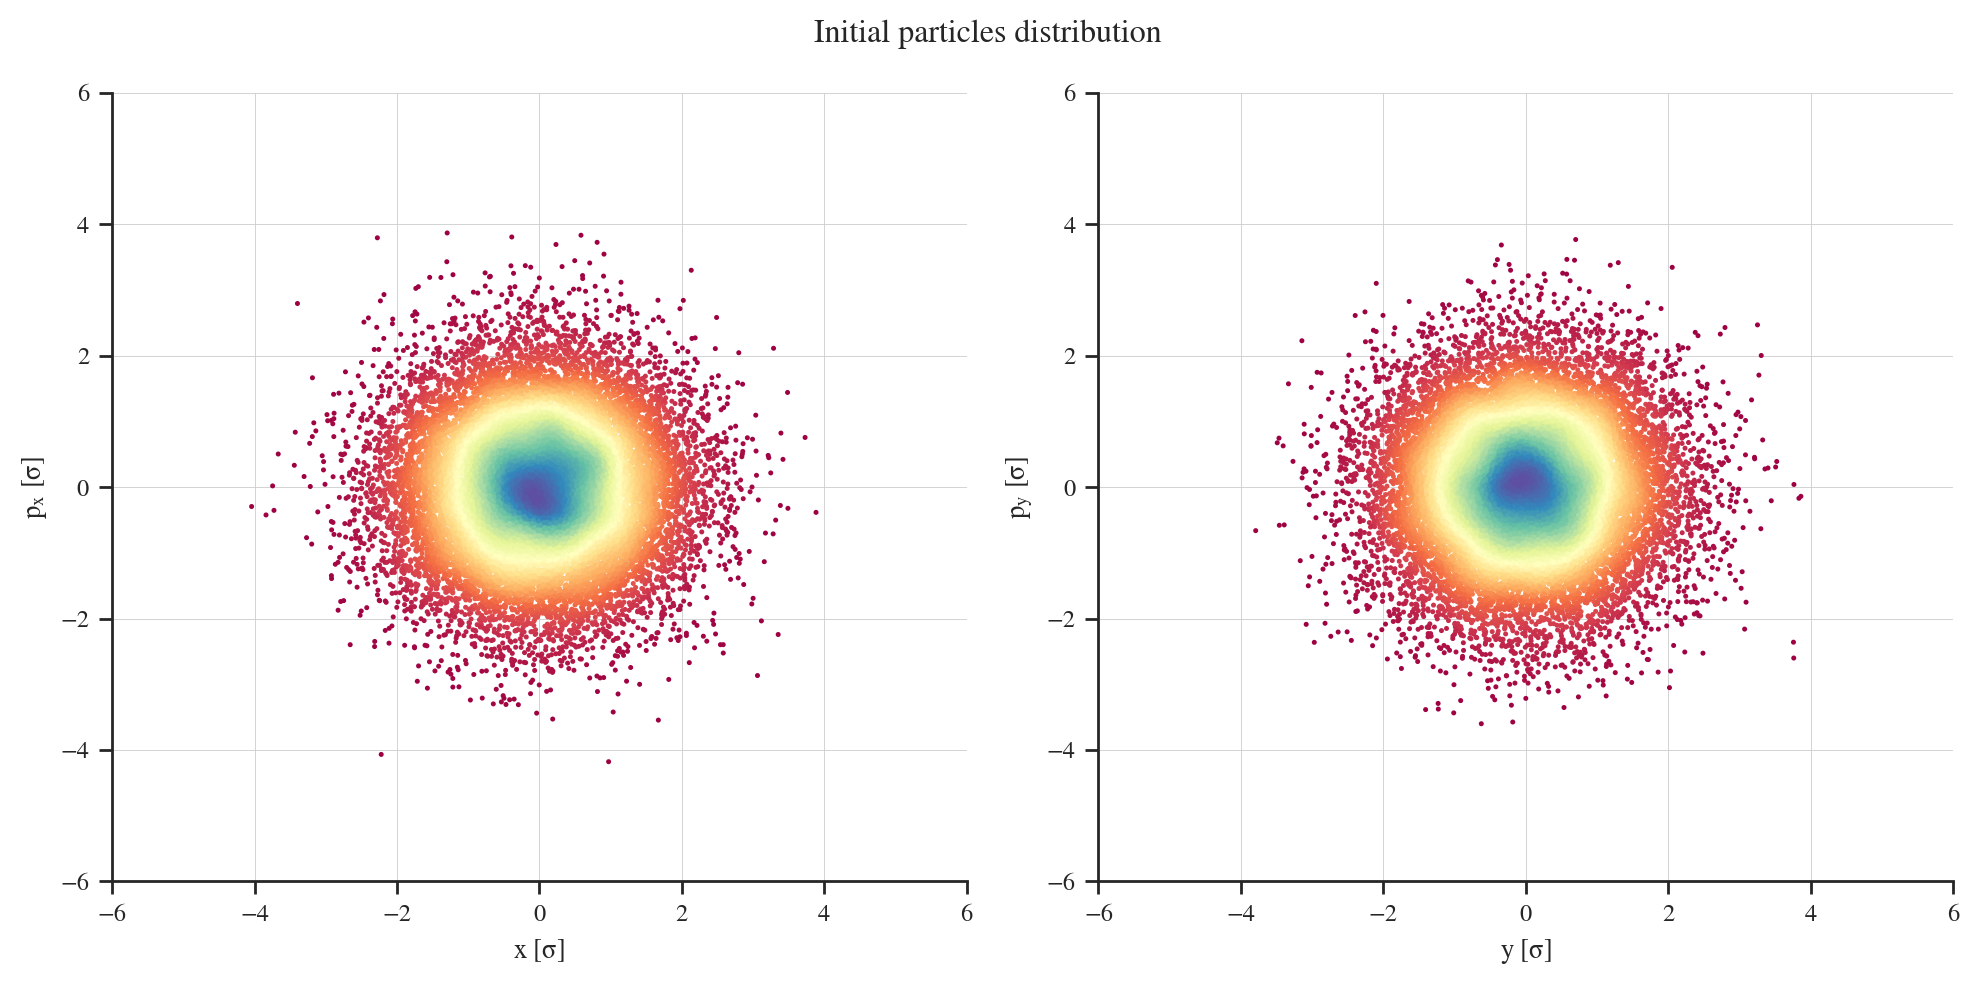

In [4]:
df_input_with_norm = dic_obs["l_df_particles"][0]

x_input = df_input_with_norm["x_norm"]
y_input = df_input_with_norm["y_norm"]
px_input = df_input_with_norm["px_norm"]
py_input = df_input_with_norm["py_norm"]

# Calculate the point density
array_x_density = np.vstack([x_input,px_input])
x_density = gaussian_kde(array_x_density)(array_x_density)
array_y_density = np.vstack([y_input,py_input])
y_density = gaussian_kde(array_y_density)(array_y_density)


# Plot input particles (two subplots for x and y)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(x_input, px_input, s=1, c = x_density, cmap = "Spectral")
ax[0].set_xlabel(r"$x$ [$\sigma$]")
ax[0].set_ylabel(r"$p_x$ [$\sigma$]")
ax[0].grid()
ax[0].set_xlim(-6, 6)
ax[0].set_ylim(-6, 6)
ax[1].scatter(y_input, py_input, s=1, c = y_density, cmap = "Spectral")
ax[1].set_xlabel(r"$y$ [$\sigma$]")
ax[1].set_ylabel(r"$p_y$ [$\sigma$]")
ax[1].grid()
ax[1].set_xlim(-6, 6)
ax[1].set_ylim(-6, 6)
plt.suptitle("Initial particles distribution")
plt.tight_layout()
plt.savefig("initial_particles_distribution.png", dpi=300)
plt.show()

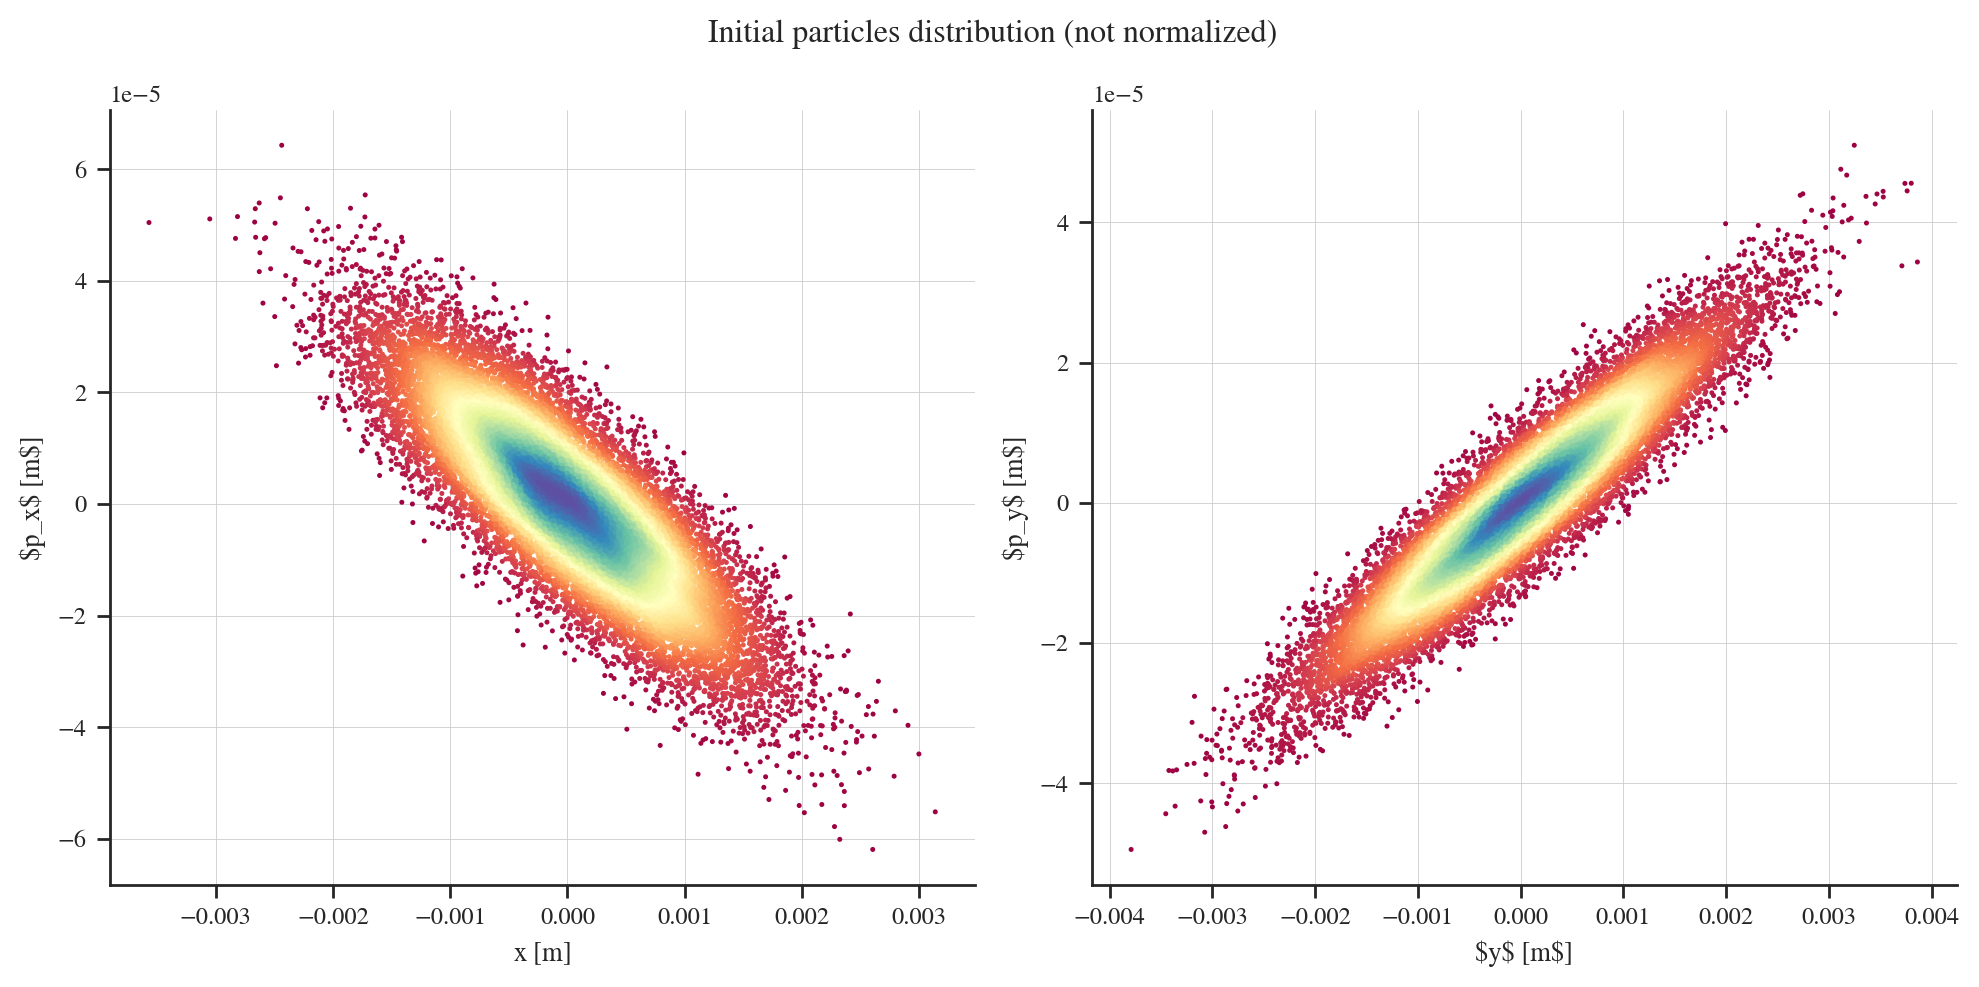

In [5]:
df_input_with_norm = dic_obs["l_df_particles"][0]

x_input = df_input_with_norm["x"]
y_input = df_input_with_norm["y"]
px_input = df_input_with_norm["px"]
py_input = df_input_with_norm["py"]

# Calculate the point density
array_x_density = np.vstack([x_input,px_input])
x_density = gaussian_kde(array_x_density)(array_x_density)
array_y_density = np.vstack([y_input,py_input])
y_density = gaussian_kde(array_y_density)(array_y_density)


# Plot input particles (two subplots for x and y)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(x_input, px_input, s=1, c = x_density, cmap = "Spectral")
ax[0].set_xlabel(r"$x$ [m]")
ax[0].set_ylabel(r"$p_x$ [m$]")
ax[0].grid()
#ax[0].set_xlim(-6, 6)
#ax[0].set_ylim(-6, 6)
ax[1].scatter(y_input, py_input, s=1, c = y_density, cmap = "Spectral")
ax[1].set_xlabel(r"$y$ [m$]")
ax[1].set_ylabel(r"$p_y$ [m$]")
ax[1].grid()
#ax[1].set_xlim(-6, 6)
#ax[1].set_ylim(-6, 6)
plt.suptitle("Initial particles distribution (not normalized)")
plt.tight_layout()
plt.savefig("initial_particles_distribution_unnormalized.png", dpi=300)
plt.show()

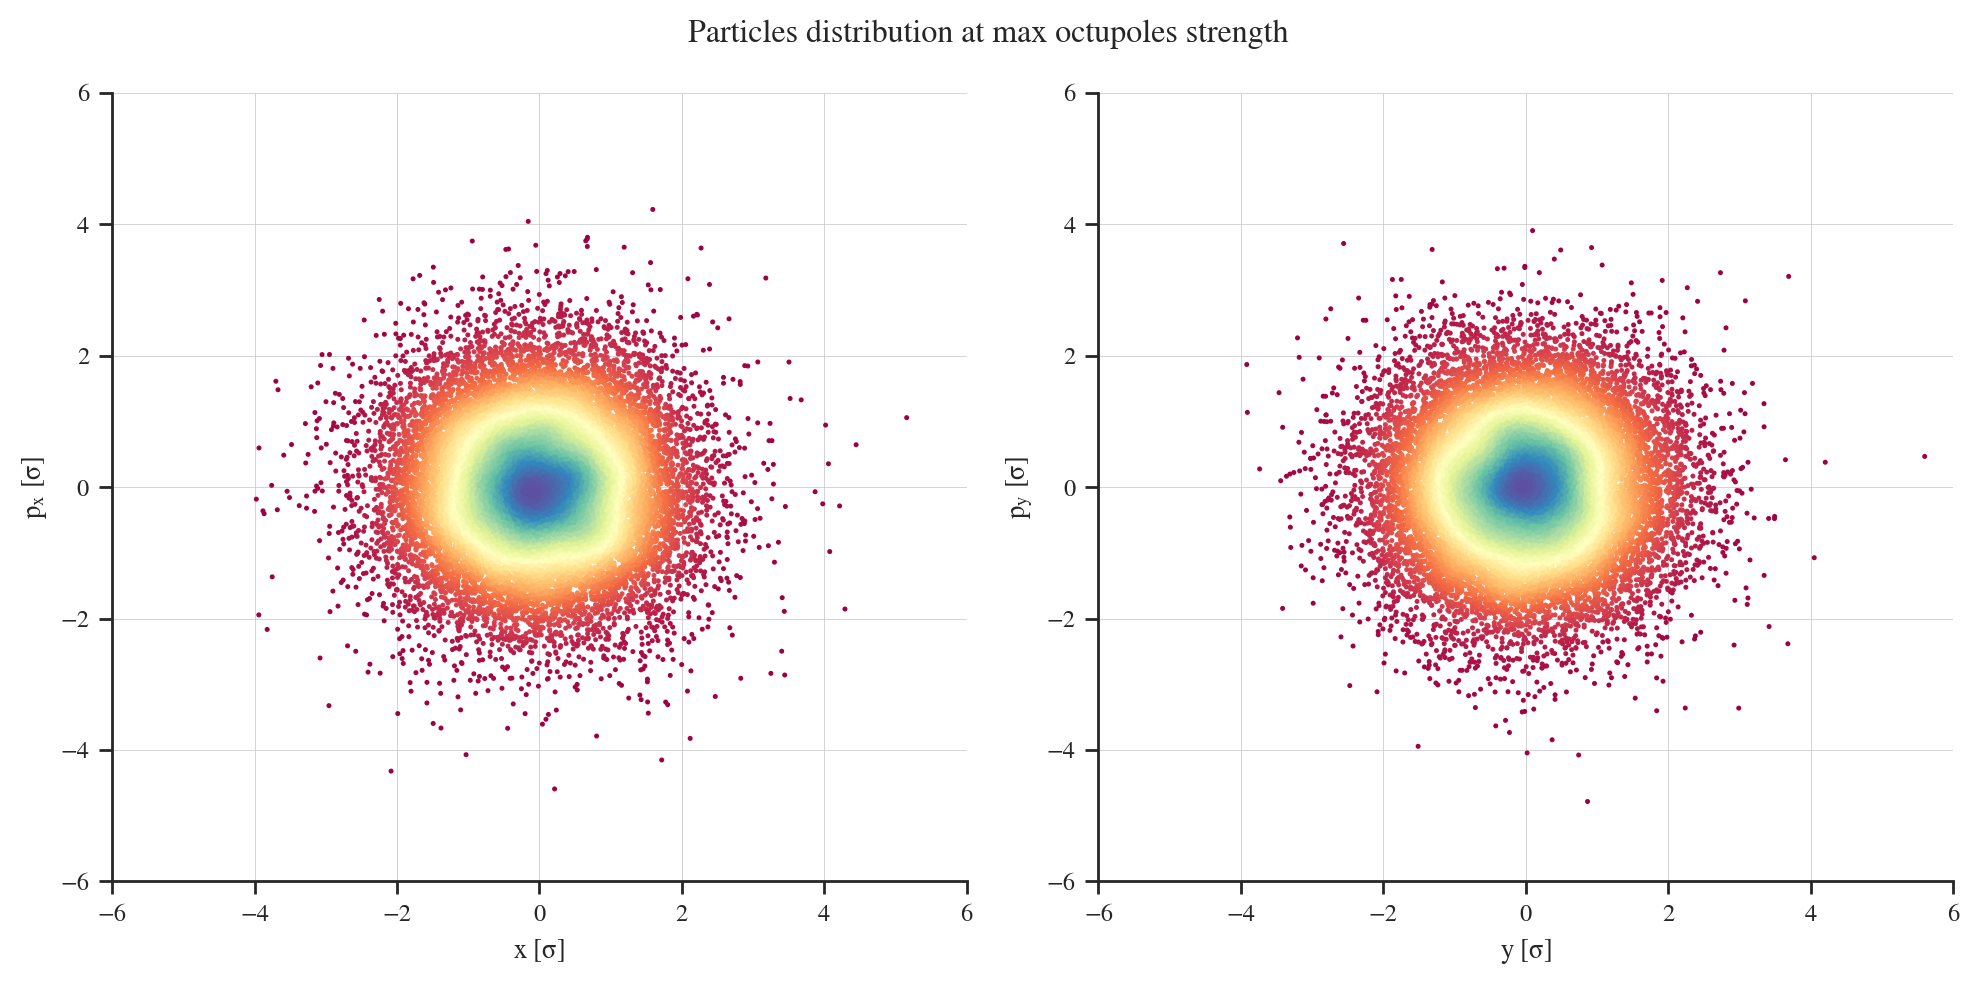

In [6]:
df_input_with_norm = dic_obs["l_df_particles"][int(len(dic_obs["l_df_particles"])/2)]

x_input = df_input_with_norm["x_norm"]
y_input = df_input_with_norm["y_norm"]
px_input = df_input_with_norm["px_norm"]
py_input = df_input_with_norm["py_norm"]

# Calculate the point density
array_x_density = np.vstack([x_input,px_input])
x_density = gaussian_kde(array_x_density)(array_x_density)
array_y_density = np.vstack([y_input,py_input])
y_density = gaussian_kde(array_y_density)(array_y_density)


# Plot input particles (two subplots for x and y)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(x_input, px_input, s=1, c = x_density, cmap = "Spectral")
ax[0].set_xlabel(r"$x$ [$\sigma$]")
ax[0].set_ylabel(r"$p_x$ [$\sigma$]")
ax[0].grid()
ax[0].set_xlim(-6, 6)
ax[0].set_ylim(-6, 6)
ax[1].scatter(y_input, py_input, s=1, c = y_density, cmap = "Spectral")
ax[1].set_xlabel(r"$y$ [$\sigma$]")
ax[1].set_ylabel(r"$p_y$ [$\sigma$]")
ax[1].grid()
ax[1].set_xlim(-6, 6)
ax[1].set_ylim(-6, 6)
plt.suptitle("Particles distribution at max octupoles strength")
plt.tight_layout()
plt.savefig("max_octupoles_particles_distribution.png", dpi=300)
plt.show()

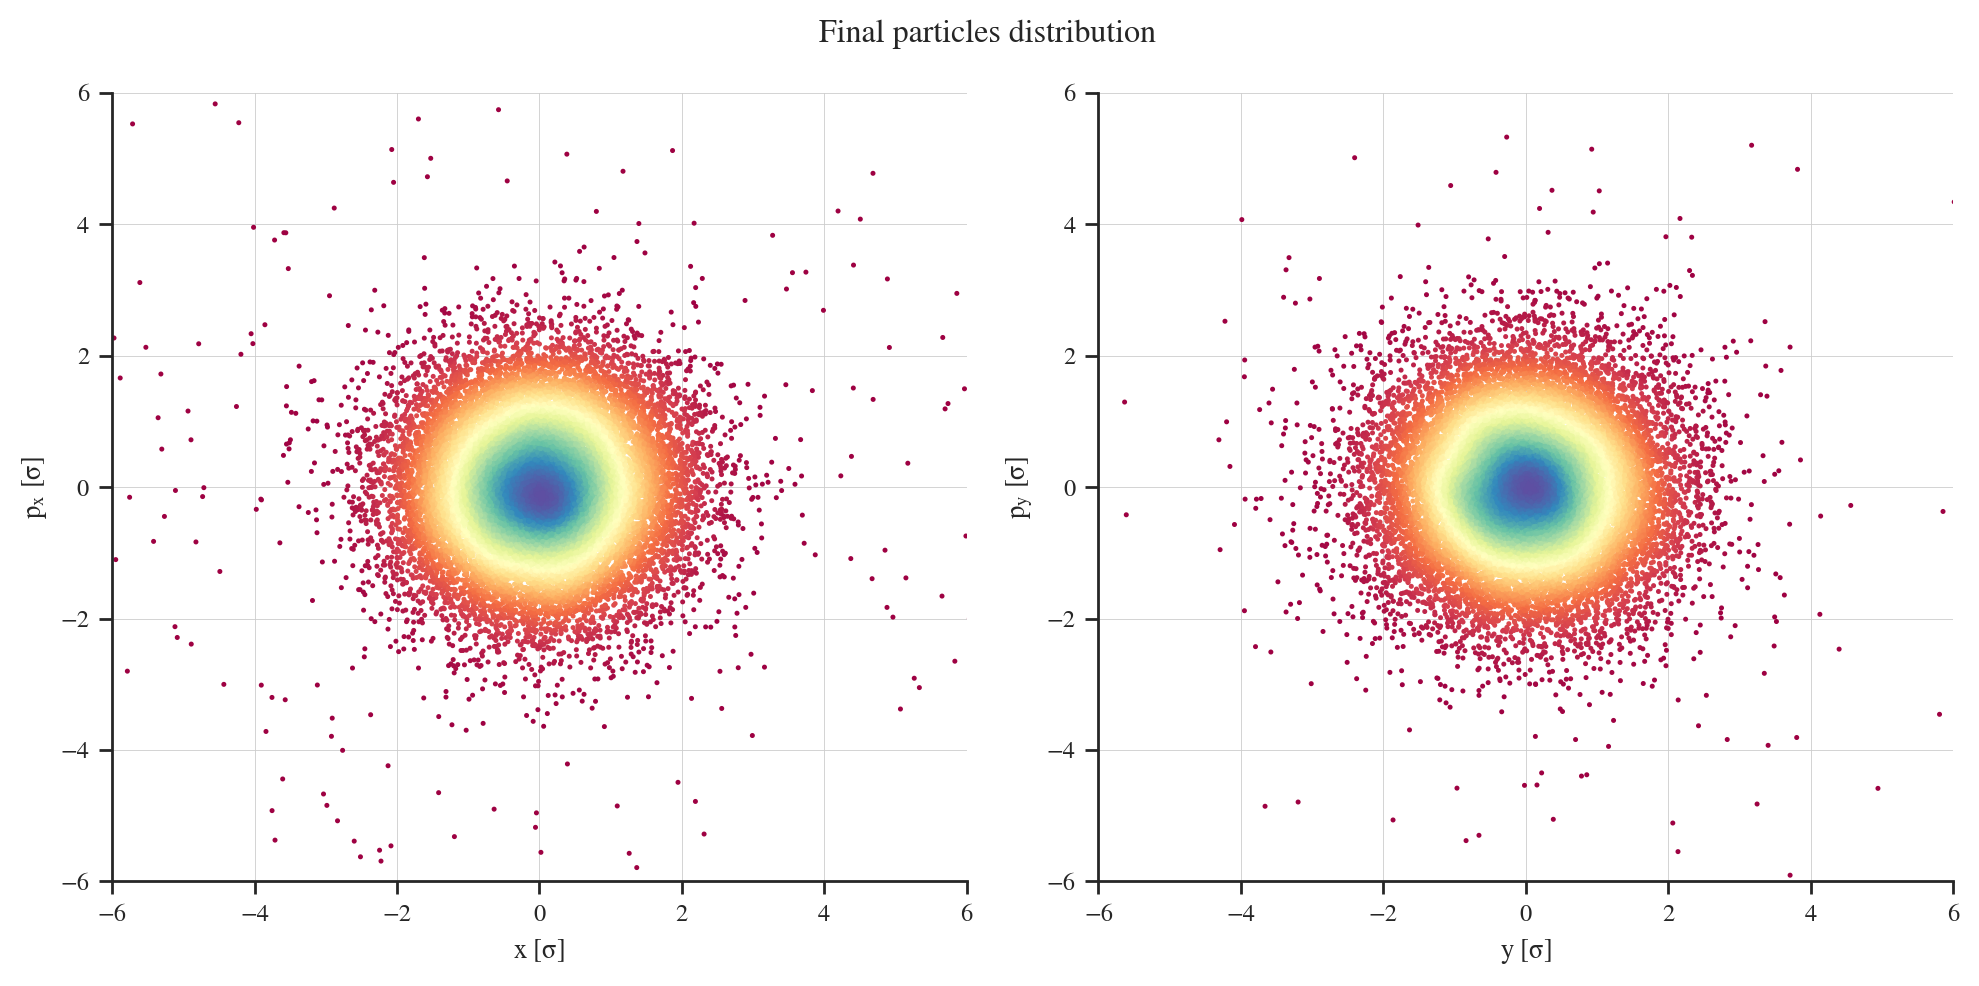

In [7]:
df_input_with_norm = dic_obs["l_df_particles"][-1]

x_input = df_input_with_norm["x_norm"]
y_input = df_input_with_norm["y_norm"]
px_input = df_input_with_norm["px_norm"]
py_input = df_input_with_norm["py_norm"]

# Calculate the point density
array_x_density = np.vstack([x_input,px_input])
x_density = gaussian_kde(array_x_density)(array_x_density)
array_y_density = np.vstack([y_input,py_input])
y_density = gaussian_kde(array_y_density)(array_y_density)


# Plot input particles (two subplots for x and y)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(x_input, px_input, s=1, c = x_density, cmap = "Spectral")
ax[0].set_xlabel(r"$x$ [$\sigma$]")
ax[0].set_ylabel(r"$p_x$ [$\sigma$]")
ax[0].grid()
ax[0].set_xlim(-6, 6)
ax[0].set_ylim(-6, 6)
ax[1].scatter(y_input, py_input, s=1, c = y_density, cmap = "Spectral")
ax[1].set_xlabel(r"$y$ [$\sigma$]")
ax[1].set_ylabel(r"$p_y$ [$\sigma$]")
ax[1].grid()
ax[1].set_xlim(-6, 6)
ax[1].set_ylim(-6, 6)
plt.suptitle("Final particles distribution")
plt.tight_layout()
plt.savefig("final_particles_distribution.png", dpi=300)
plt.show()

### Plot evolution octupoles and particles loss

In [8]:
l_n_particles = [len(df) for df in dic_obs["l_df_particles"]]
l_n_particles_lost = [(len(dic_obs["l_df_particles"][0]) - n)*100/len(dic_obs["l_df_particles"][0]) for n in l_n_particles]

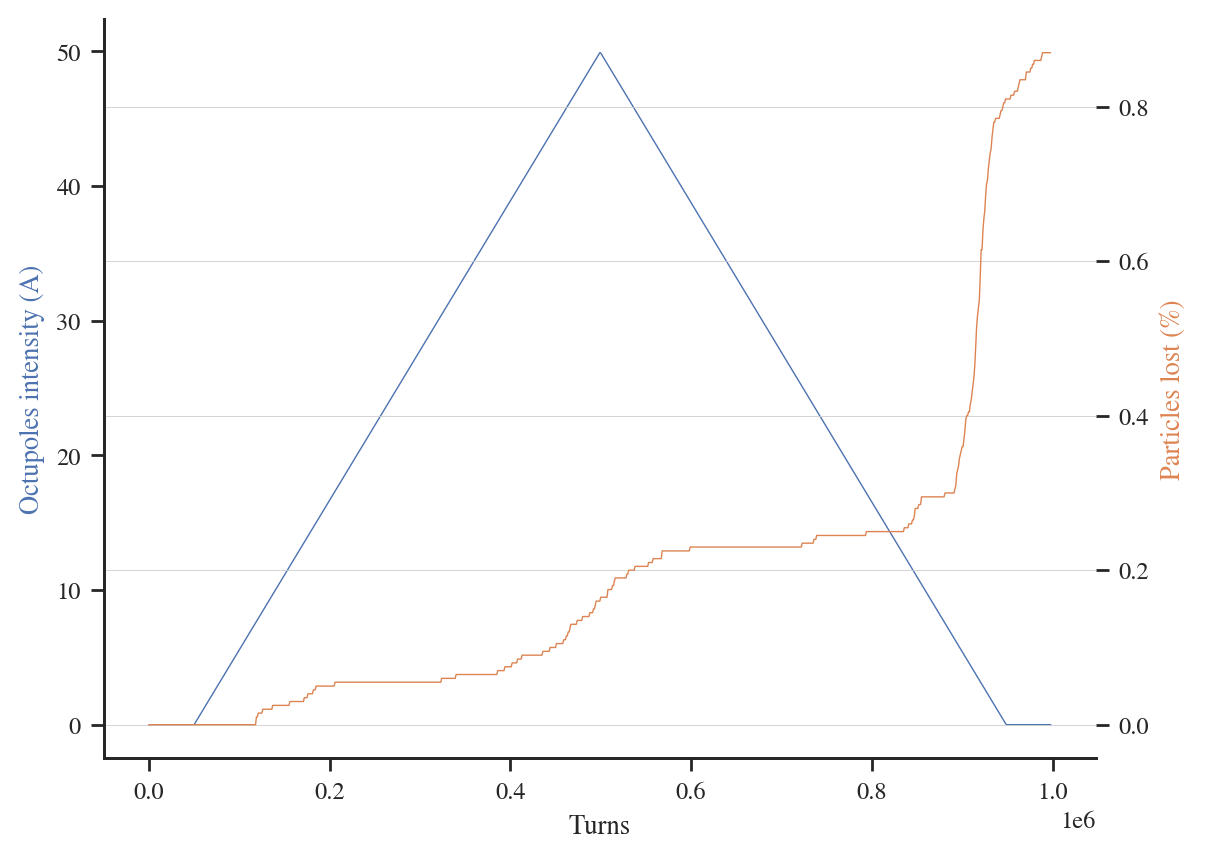

In [9]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(dic_obs["l_n_turns"], dic_obs["l_oct"], color = 'C0')
ax2.plot(dic_obs["l_n_turns"], l_n_particles_lost, color = 'C1')
ax1.set_xlabel("Turns")
ax1.set_ylabel("Octupoles intensity (A)", color = 'C0')
ax2.set_ylabel("Particles lost (%)", color = 'C1')
plt.grid()
plt.savefig("octupoles_intensity_and_particles_lost.png", dpi=300)
plt.show()


### Plot evolution distribution

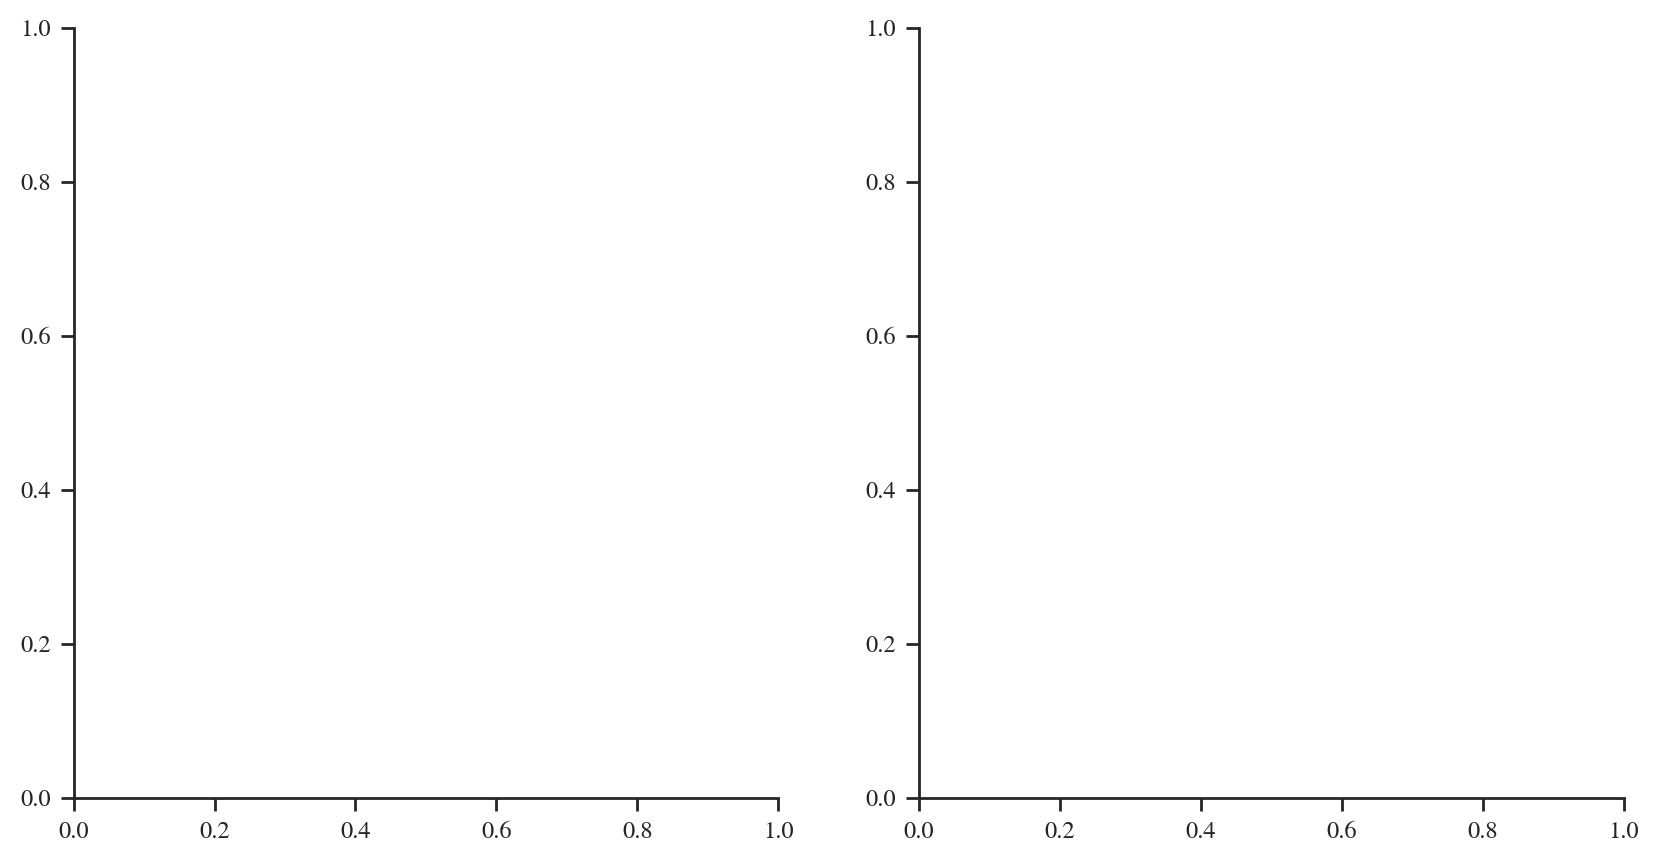

In [10]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Assume df is your DataFrame
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

def update(frame):
    ax[0].clear()
    ax[1].clear()
    
    df_turn = dic_obs['l_df_particles'][frame]
    turns = dic_obs['l_n_turns'][frame]

    # Calculate the point density
    array_x_density = np.vstack([df_turn["x_norm"],df_turn["px_norm"]])
    x_density = gaussian_kde(array_x_density)(array_x_density)
    array_y_density = np.vstack([df_turn["y_norm"],df_turn["py_norm"]])
    y_density = gaussian_kde(array_y_density)(array_y_density)

    ax[0].scatter(df_turn["x_norm"], df_turn["px_norm"], s=1, c = x_density, cmap = "Spectral")
    ax[0].set_xlabel(r"$x$ [$\sigma$]")
    ax[0].set_ylabel(r"$p_x$ [$\sigma$]")

    ax[1].scatter(df_turn["y_norm"], df_turn["py_norm"], s=1, c = y_density, cmap = "Spectral")
    ax[1].set_xlabel(r"$y$ [$\sigma$]")
    ax[1].set_ylabel(r"$p_y$ [$\sigma$]")

    ax[0].set_xlim(-8, 8)
    ax[0].set_ylim(-8, 8)
    ax[1].set_xlim(-8, 8)
    ax[1].set_ylim(-8, 8)

    ax[0].set_title("Horizontal plane")
    ax[1].set_title("Vertical plane")

    ax[0].grid()
    ax[1].grid()
    
    plt.suptitle(f"Particles distribution at turn {turns}, oct = {dic_obs['l_oct'][frame]:.2f} A")

    # ax[0].ticklabel_format(axis='both', style='sci', scilimits=(0,0))
    # ax[1].ticklabel_format(axis='both', style='sci', scilimits=(0,0))

    # Position legend at top right
    # ax[0].legend( loc='upper right')
    # ax[1].legend( loc='upper right')

    plt.tight_layout()

# Assuming you have df as your DataFrame
# animation = FuncAnimation(fig, update, frames=len(dic_obs['l_df_particles']), interval=100, repeat=False)
#animation = FuncAnimation(fig, update, frames=10, interval=100, repeat=False)

# Save the animation as a GIF using PillowWriter
# animation.save('animation.gif', writer='pillow', fps=100)

plt.show()

### Plot evolution emittance

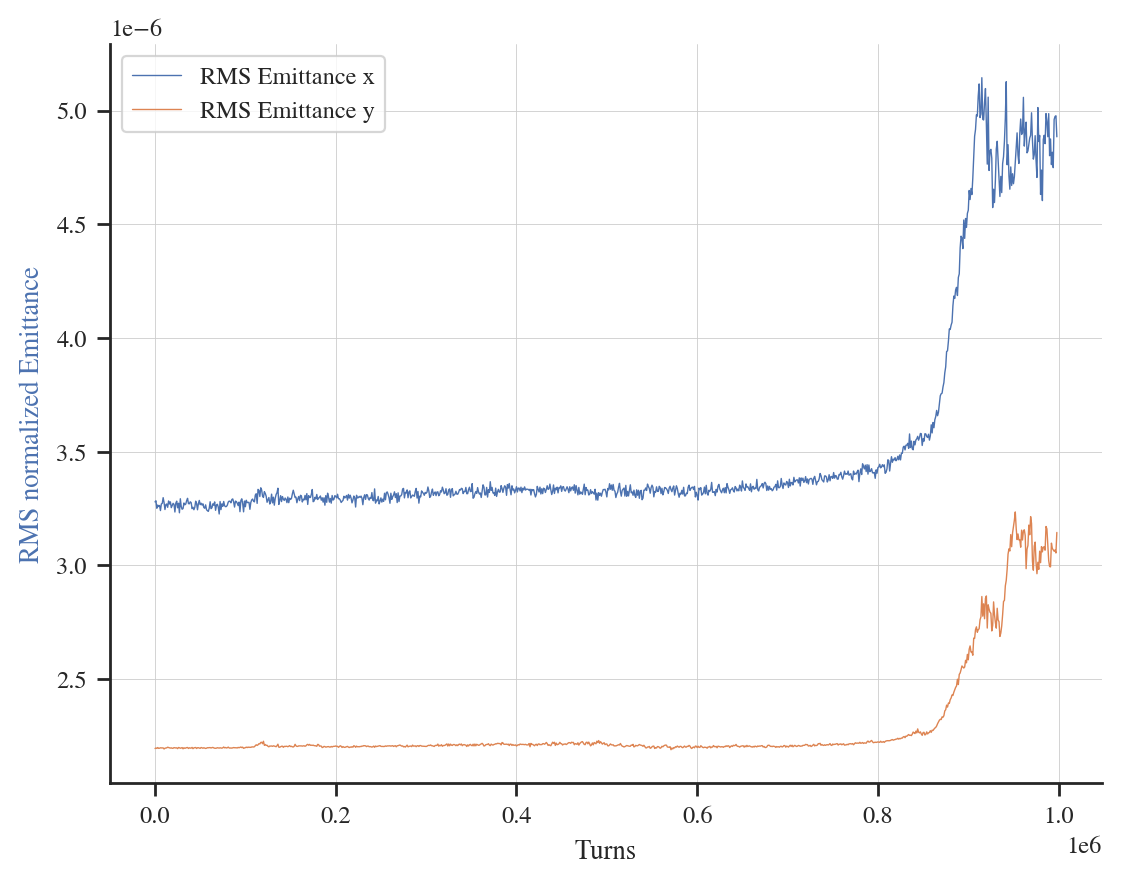

In [11]:
# Get emittance
l_emittance_x = []
l_emittance_y = []
l_total_emittance = []

for i, df in enumerate(dic_obs["l_df_particles"]):
    sigma_x_2 = np.mean( (df["x"] - np.mean(df["x"]))**2 )
    
    sigma_px_2 = np.mean( (df["px"] - np.mean(df["px"]))**2 )
    sigma_x_px = np.mean( (df["x"] - np.mean(df["x"])) * (df["px"] - np.mean(df["px"])) )
    emittance_x = np.sqrt(sigma_x_2 * sigma_px_2 - sigma_x_px**2)
    sigma_y_2 = np.mean( (df["y"] - np.mean(df["y"]))**2 )
    sigma_py_2 = np.mean( (df["py"] - np.mean(df["py"]))**2 )
    sigma_y_py = np.mean( (df["y"] - np.mean(df["y"])) * (df["py"] - np.mean(df["py"])) )
    emittance_y = np.sqrt(sigma_y_2 * sigma_py_2 - sigma_y_py**2)
    sigma_x_y = np.mean( (df["x"] - np.mean(df["x"])) * (df["y"] - np.mean(df["y"])) )
    sigma_x_py = np.mean( (df["x"] - np.mean(df["x"])) * (df["py"] - np.mean(df["py"])) )
    sigma_px_y = np.mean( (df["px"] - np.mean(df["px"])) * (df["y"] - np.mean(df["y"])) )
    sigma_px_py = np.mean( (df["px"] - np.mean(df["px"])) * (df["py"] - np.mean(df["py"])) )

    total_emittance = np.sqrt(np.linalg.det([[sigma_x_2, sigma_x_px, sigma_x_y, sigma_x_py],
                                        [sigma_x_px, sigma_px_2, sigma_px_y, sigma_px_py],
                                        [sigma_x_y, sigma_px_y, sigma_y_2, sigma_y_py],
                                        [sigma_x_py, sigma_px_py, sigma_y_py, sigma_py_2]]))
    gamma = 480.59
    l_emittance_x.append(emittance_x * gamma)
    l_emittance_y.append(emittance_y * gamma)
    l_total_emittance.append(total_emittance * gamma)

fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()

ax1.plot(dic_obs["l_n_turns"], l_emittance_x, color = 'C0', label = "RMS Emittance x")
ax1.plot(dic_obs["l_n_turns"], l_emittance_y, color = 'C1', label = "RMS Emittance y")
#ax1.plot(dic_obs["l_n_turns"], l_total_emittance, color = 'C2', label = "Total Emittance")
ax1.set_xlabel("Turns")
ax1.set_ylabel("RMS normalized Emittance", color = 'C0')
#ax2.set_ylabel("Emittance y [$\sigma$]", color = 'C1')
plt.grid()
plt.legend()
plt.savefig("emittance.png", dpi=300)
plt.show()



## Bootstrapping to see how the loss evolve depending on the distribution

In [12]:
# Reload the data
with open("observables.pkl", "rb") as f:
    dic_obs = pickle.load(f)


FileNotFoundError: [Errno 2] No such file or directory: 'observables.pkl'

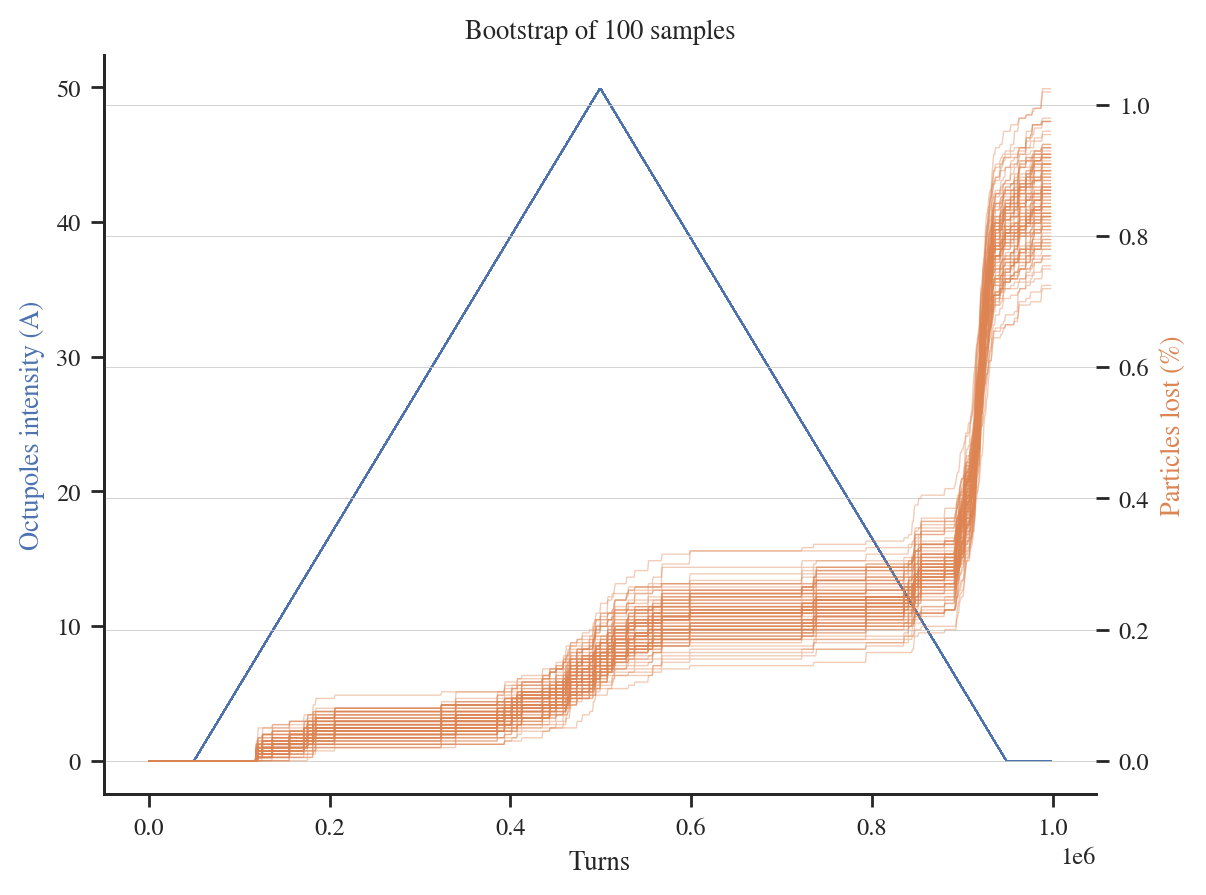

In [ ]:
n = 20000
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
for idx_bootstrap in range(100):
    bootstap_indices = np.random.randint(0, n, size=n)
    dic_obs_bootstrap = {
        "l_df_particles": [df.iloc[bootstap_indices] for df in dic_obs["l_df_particles"]],
    }

    # Remove lost particles
    dic_obs_bootstrap['l_df_particles'] = [df_particles[df_particles['state']==1] for df_particles in dic_obs_bootstrap['l_df_particles']]
    l_n_particles = [len(df) for df in dic_obs_bootstrap["l_df_particles"]]
    l_n_particles_lost = [(len(dic_obs_bootstrap["l_df_particles"][0]) - n)*100/len(dic_obs_bootstrap["l_df_particles"][0]) for n in l_n_particles]



    ax1.plot(dic_obs["l_n_turns"], dic_obs["l_oct"], color = 'C0')
    ax2.plot(dic_obs["l_n_turns"], l_n_particles_lost, color = 'C1', alpha = 0.4)
ax1.set_xlabel("Turns")
ax1.set_ylabel("Octupoles intensity (A)", color = 'C0')
ax2.set_ylabel("Particles lost (%)", color = 'C1')
plt.grid()
plt.title("Bootstrap of 100 samples")
plt.savefig("octupoles_intensity_and_particles_lost.png", dpi=300)
plt.show()


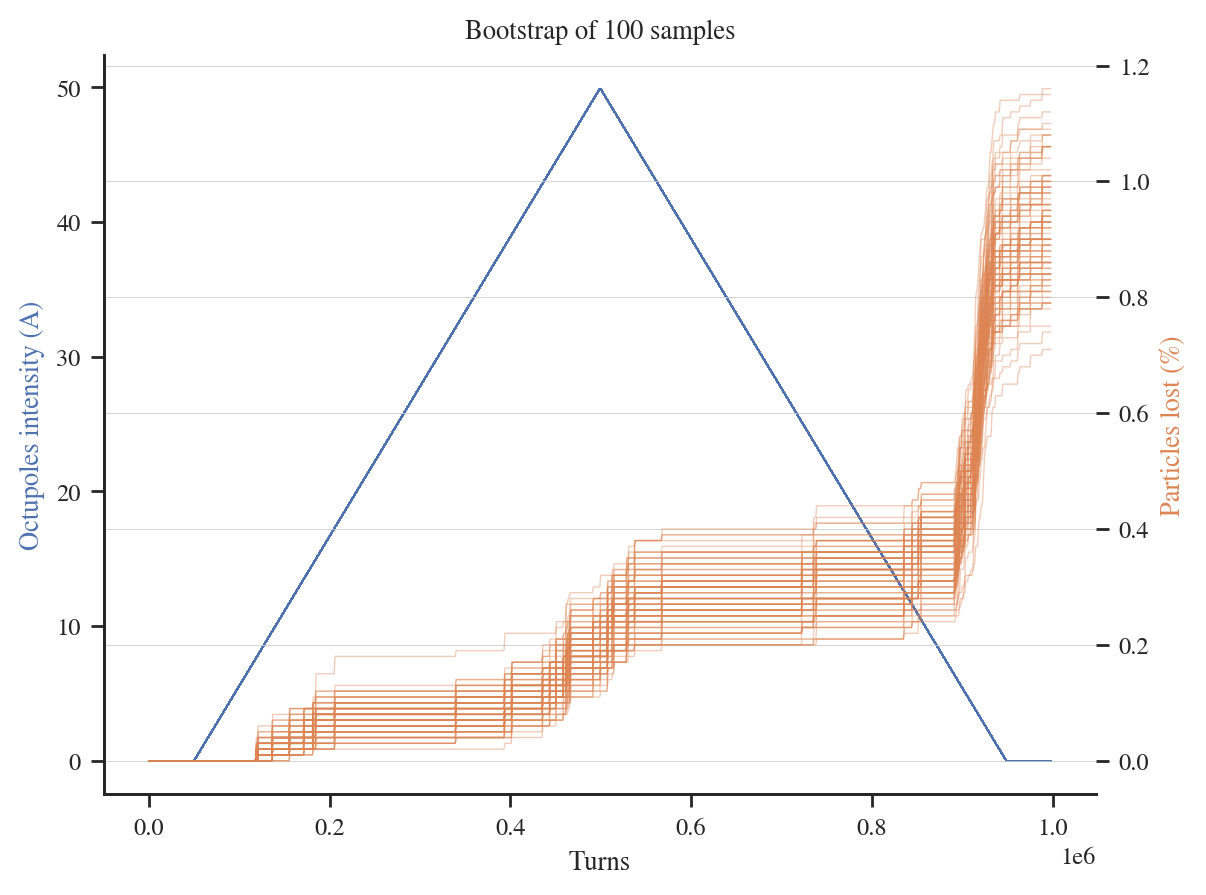

In [ ]:
n = 10000
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
for idx_bootstrap in range(100):
    bootstap_indices = np.random.randint(0, n, size=n)
    dic_obs_bootstrap = {
        "l_df_particles": [df.iloc[bootstap_indices] for df in dic_obs["l_df_particles"]],
    }

    # Remove lost particles
    dic_obs_bootstrap['l_df_particles'] = [df_particles[df_particles['state']==1] for df_particles in dic_obs_bootstrap['l_df_particles']]
    l_n_particles = [len(df) for df in dic_obs_bootstrap["l_df_particles"]]
    l_n_particles_lost = [(len(dic_obs_bootstrap["l_df_particles"][0]) - n)*100/len(dic_obs_bootstrap["l_df_particles"][0]) for n in l_n_particles]



    ax1.plot(dic_obs["l_n_turns"], dic_obs["l_oct"], color = 'C0')
    ax2.plot(dic_obs["l_n_turns"], l_n_particles_lost, color = 'C1', alpha = 0.4)
ax1.set_xlabel("Turns")
ax1.set_ylabel("Octupoles intensity (A)", color = 'C0')
ax2.set_ylabel("Particles lost (%)", color = 'C1')
plt.grid()
plt.title("Bootstrap of 100 samples")
plt.savefig("octupoles_intensity_and_particles_lost.png", dpi=300)
plt.show()

In [17]:
# Load data repetition
with open(
    "/home/HPC/cdroin/dynamic_collapse/master_study/scans/dynamic_octupoles_injection/base_collider/xtrack_0001_different_WP/gen_3bis/observables.pkl",
    "rb",
) as f:
    dic_obs_bis = pickle.load(f)

df_input_bis = pd.read_parquet(
    "/home/HPC/cdroin/dynamic_collapse/master_study/scans/dynamic_octupoles_injection/base_collider/xtrack_0001_different_WP/gen_3bis/input_particles.parquet"
)

dic_obs_bis

{'l_df_particles': [       particle_id         x            px         y        py      zeta  \
  0                0  0.000157  1.693247e-05  0.000764  0.000012 -0.024328   
  1                1  0.000406  6.651860e-07 -0.002164 -0.000035  0.053271   
  2                2  0.001008  3.547375e-06 -0.000289 -0.000006  0.048182   
  3                3 -0.000827  1.566922e-05  0.000492  0.000006 -0.054564   
  4                4 -0.000269  1.232332e-05  0.000342 -0.000002  0.123897   
  ...            ...       ...           ...       ...       ...       ...   
  19996        19996  0.000907 -4.204390e-06 -0.000126 -0.000002  0.076584   
  19997        19997  0.000227  2.447662e-06  0.001833  0.000021 -0.146420   
  19998        19998  0.000276 -2.812300e-06 -0.001355 -0.000018  0.031879   
  19999        19999 -0.000490  8.626983e-06 -0.001395 -0.000016  0.060178   
  20000        20000 -0.000513  1.690968e-05  0.001199  0.000015  0.177351   
  
            pzeta  particle_id_norm    x_no

In [18]:
df_input_bis

start_tracking_at_element   q0         mass0    s      zeta  chi  \
0                             -1  1.0  9.382721e+08  0.0 -0.024328  1.0   
1                             -1  1.0  9.382721e+08  0.0  0.053271  1.0   
2                             -1  1.0  9.382721e+08  0.0  0.048182  1.0   
3                             -1  1.0  9.382721e+08  0.0 -0.054564  1.0   
4                             -1  1.0  9.382721e+08  0.0  0.123897  1.0   
...                          ...  ...           ...  ...       ...  ...   
19996                         -1  1.0  9.382721e+08  0.0  0.076584  1.0   
19997                         -1  1.0  9.382721e+08  0.0 -0.146420  1.0   
19998                         -1  1.0  9.382721e+08  0.0  0.031879  1.0   
19999                         -1  1.0  9.382721e+08  0.0  0.060178  1.0   
20000                         -1  1.0  9.382721e+08  0.0  0.177351  1.0   

       charge_ratio        weight  pdg_id  particle_id  ...         y  \
0               1.0  8.999550e+06       0            0  ...  0.000764   
1               1.0  8.999550e+06       0            1  ... -0.002164   
2               1.0  8.999550e+06       0            2  ... -0.000289   
3               1.0  8.999550e+06       0            3  ...  0.000492   
4               1.0  8.999550e+06       0            4  ...  0.000342   
...             ...           ...     ...          ...  ...       ...   
19996           1.0  8.999550e+06       0        19996  ... -0.000126   
19997           1.0  8.999550e+06       0        19997  ...  0.001833   
19998           1.0  8.999550e+06       0        19998  ... -0.001355   
19999           1.0  8.999550e+06       0        19999  ... -0.001395   
20000           1.0  8.999550e+06       0        20000  ...  0.001199   

                 px        py     delta      ptau  rvv       rpp  \
0      1.693247e-05  0.000012 -0.000495 -0.000495  1.0  1.000496   
1      6.651860e-07 -0.000035 -0.000045 -0.000045  1.0  1.000045   
2      3.547375e-06 -0.000006 -0.000659 -0.000659  1.0  1.000659   
3      1.566922e-05  0.000006  0.000074  0.000074  1.0  0.999926   
4      1.232332e-05 -0.000002 -0.000257 -0.000257  1.0  1.000258   
...             ...       ...       ...       ...  ...       ...   
19996 -4.204390e-06 -0.000002 -0.000838 -0.000838  1.0  1.000839   
19997  2.447662e-06  0.000021 -0.000289 -0.000289  1.0  1.000289   
19998 -2.812300e-06 -0.000018 -0.000245 -0.000245  1.0  1.000245   
19999  8.626983e-06 -0.000016 -0.000080 -0.000080  1.0  1.000080   
20000  1.690968e-05  0.000015  0.000196  0.000196  1.0  0.999804   

                p0c     beta0      gamma0  
0      4.499990e+11  0.999998  479.605016  
1      4.499990e+11  0.999998  479.605016  
2      4.499990e+11  0.999998  479.605016  
3      4.499990e+11  0.999998  479.605016  
4      4.499990e+11  0.999998  479.605016  
...             ...       ...         ...  
19996  4.499990e+11  0.999998  479.605016  
19997  4.499990e+11  0.999998  479.605016  
19998  4.499990e+11  0.999998  479.605016  
19999  4.499990e+11  0.999998  479.605016  
20000  4.499990e+11  0.999998  479.605016  

[20001 rows x 29 columns]

In [19]:
df_input

start_tracking_at_element   q0         mass0    s      zeta  chi  \
0                             -1  1.0  9.382721e+08  0.0 -0.105993  1.0   
1                             -1  1.0  9.382721e+08  0.0 -0.114309  1.0   
2                             -1  1.0  9.382721e+08  0.0  0.043466  1.0   
3                             -1  1.0  9.382721e+08  0.0 -0.007909  1.0   
4                             -1  1.0  9.382721e+08  0.0 -0.021471  1.0   
...                          ...  ...           ...  ...       ...  ...   
19995                         -1  1.0  9.382721e+08  0.0 -0.050522  1.0   
19996                         -1  1.0  9.382721e+08  0.0 -0.047452  1.0   
19997                         -1  1.0  9.382721e+08  0.0 -0.044540  1.0   
19998                         -1  1.0  9.382721e+08  0.0  0.035199  1.0   
19999                         -1  1.0  9.382721e+08  0.0 -0.025487  1.0   

       charge_ratio     weight  pdg_id  particle_id  ...         y        px  \
0               1.0  9000000.0       0            0  ... -0.000516 -0.000008   
1               1.0  9000000.0       0            1  ...  0.001296 -0.000005   
2               1.0  9000000.0       0            2  ...  0.000641  0.000009   
3               1.0  9000000.0       0            3  ... -0.001185  0.000019   
4               1.0  9000000.0       0            4  ... -0.002315  0.000008   
...             ...        ...     ...          ...  ...       ...       ...   
19995           1.0  9000000.0       0        19995  ...  0.000526 -0.000006   
19996           1.0  9000000.0       0        19996  ...  0.001772  0.000005   
19997           1.0  9000000.0       0        19997  ... -0.000557  0.000017   
19998           1.0  9000000.0       0        19998  ... -0.000221 -0.000006   
19999           1.0  9000000.0       0        19999  ...  0.001460 -0.000023   

             py     delta      ptau  rvv       rpp           p0c     beta0  \
0     -0.000005 -0.000301 -0.000301  1.0  1.000301  4.499990e+11  0.999998   
1      0.000018  0.000612  0.000612  1.0  0.999388  4.499990e+11  0.999998   
2      0.000011  0.000535  0.000535  1.0  0.999465  4.499990e+11  0.999998   
3     -0.000017  0.000528  0.000528  1.0  0.999472  4.499990e+11  0.999998   
4     -0.000016  0.000523  0.000523  1.0  0.999477  4.499990e+11  0.999998   
...         ...       ...       ...  ...       ...           ...       ...   
19995  0.000002  0.000395  0.000395  1.0  0.999605  4.499990e+11  0.999998   
19996  0.000022 -0.000443 -0.000443  1.0  1.000443  4.499990e+11  0.999998   
19997 -0.000011  0.000172  0.000172  1.0  0.999828  4.499990e+11  0.999998   
19998 -0.000006  0.000501  0.000501  1.0  0.999500  4.499990e+11  0.999998   
19999  0.000023  0.000397  0.000397  1.0  0.999603  4.499990e+11  0.999998   

           gamma0  
0      479.605016  
1      479.605016  
2      479.605016  
3      479.605016  
4      479.605016  
...           ...  
19995  479.605016  
19996  479.605016  
19997  479.605016  
19998  479.605016  
19999  479.605016  

[20000 rows x 29 columns]

In [14]:
l_n_particles_bis = [len(df) for df in dic_obs_bis["l_df_particles"]]
l_n_particles_lost_bis = [(len(dic_obs_bis["l_df_particles"][0]) - n)*100/len(dic_obs_bis["l_df_particles"][0]) for n in l_n_particles]

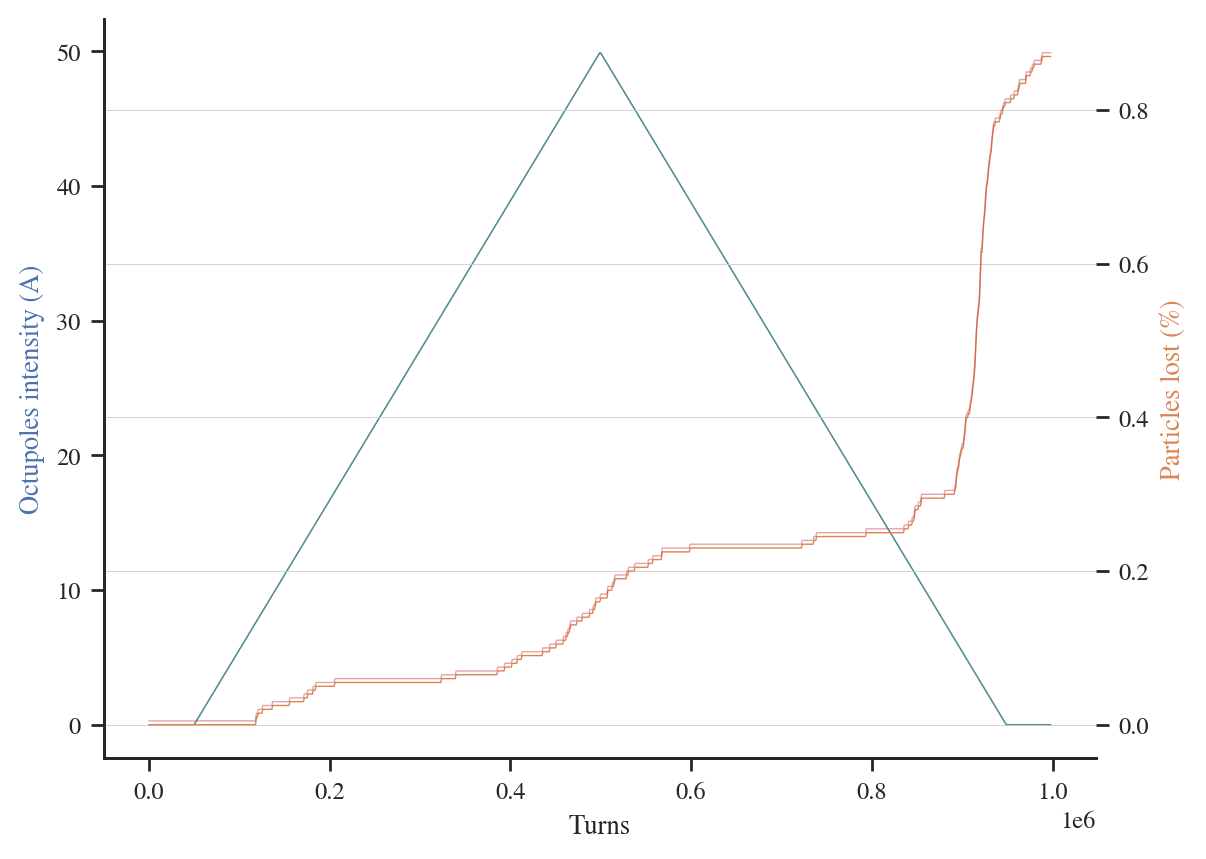

In [16]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(dic_obs["l_n_turns"], dic_obs["l_oct"], color = 'C0')
ax2.plot(dic_obs["l_n_turns"], l_n_particles_lost, color = 'C1')
ax1.plot(dic_obs_bis["l_n_turns"], dic_obs_bis["l_oct"], color = 'C2', alpha = 0.5)
ax2.plot(dic_obs_bis["l_n_turns"], l_n_particles_lost_bis, color = 'C3', alpha = 0.5)
ax1.set_xlabel("Turns")
ax1.set_ylabel("Octupoles intensity (A)", color = 'C0')
ax2.set_ylabel("Particles lost (%)", color = 'C1')
plt.grid()
plt.savefig("octupoles_intensity_and_particles_lost_bis.png", dpi=300)
plt.show()
